In [1]:
import os
import re
import json
import numpy as np
import pandas as pd
# import dask
# import dask.dataframe as dd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import scipy

In [2]:
import chart_studio.plotly as ply
import plotly.graph_objs as go
from chart_studio.plotly import iplot

In [3]:
with open(os.path.expanduser('~/.plotly_auth'), 'r') as file:
    tmp = json.load(file)
plotly_user = tmp['username']
plotly_key = tmp['api_key']

In [4]:
df = pd.read_csv('r1c5va879uaex_r1c639xp952g4.csv', index_col=0)
df

/work/05204/rpg/jupyter_packages/envs/dask/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/work/05204/rpg/jupyter_packages/envs/dask/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,inc_temp,inc_time_1,inc_time_2,plan,lab,growth_media_1,growth_media_2,od_cutoff,source_container,lab_id,...,SSC_H,BL1_H,RL1_H,FSC_W,SSC_W,BL1_W,RL1_W,index,live_no_stain,live
0,warm_30,16:hour,16:hour,11_8_2018_1,transcriptic,standard_media,standard_media,0.1,ct1bvwm8bbtq9e,r1c5va879uaex_r1c639xp952g4,...,760446.0,695.0,6353.0,1023.0,1023.0,0.0,0.0,0,0,0.0
1,warm_30,16:hour,16:hour,11_8_2018_1,transcriptic,standard_media,standard_media,0.1,ct1bvwm8bbtq9e,r1c5va879uaex_r1c639xp952g4,...,52136.0,103.0,67.0,20.0,33.0,0.0,0.0,1,1,1.0
2,warm_30,16:hour,16:hour,11_8_2018_1,transcriptic,standard_media,standard_media,0.1,ct1bvwm8bbtq9e,r1c5va879uaex_r1c639xp952g4,...,263206.0,267.0,86.0,35.0,86.0,0.0,0.0,2,1,1.0
3,warm_30,16:hour,16:hour,11_8_2018_1,transcriptic,standard_media,standard_media,0.1,ct1bvwm8bbtq9e,r1c5va879uaex_r1c639xp952g4,...,258952.0,457.0,95.0,32.0,81.0,0.0,0.0,3,1,0.0
4,warm_30,16:hour,16:hour,11_8_2018_1,transcriptic,standard_media,standard_media,0.1,ct1bvwm8bbtq9e,r1c5va879uaex_r1c639xp952g4,...,69802.0,66.0,58.0,20.0,35.0,0.0,0.0,4,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702149,warm_30,16:hour,16:hour,11_8_2018_1,transcriptic,standard_media,standard_media,0.1,ct1bvwm8bbtq9e,r1c5va879uaex_r1c639xp952g4,...,238988.0,706.0,96.0,42.0,95.0,0.0,0.0,2702149,1,NaN
2702150,warm_30,16:hour,16:hour,11_8_2018_1,transcriptic,standard_media,standard_media,0.1,ct1bvwm8bbtq9e,r1c5va879uaex_r1c639xp952g4,...,212047.0,569.0,98.0,42.0,90.0,0.0,0.0,2702150,1,NaN
2702151,warm_30,16:hour,16:hour,11_8_2018_1,transcriptic,standard_media,standard_media,0.1,ct1bvwm8bbtq9e,r1c5va879uaex_r1c639xp952g4,...,399107.0,1220.0,153.0,62.0,137.0,0.0,0.0,2702151,1,NaN
2702152,warm_30,16:hour,16:hour,11_8_2018_1,transcriptic,standard_media,standard_media,0.1,ct1bvwm8bbtq9e,r1c5va879uaex_r1c639xp952g4,...,254195.0,613.0,101.0,39.0,89.0,0.0,0.0,2702152,1,NaN


In [5]:
df.columns

Index(['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1',
       'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id',
       'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output',
       'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A',
       'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W',
       'index', 'live_no_stain', 'live'],
      dtype='object')

In [6]:
df['growth_media'] = df['growth_media_1']
df = df.drop(columns=['growth_media_1', 'growth_media_2'])

In [7]:
df['inc_time'] = df['inc_time_1']
df.drop(columns=['inc_time_1', 'inc_time_2'], inplace=True)

In [8]:
df.drop(columns=['plan', 'lab', 'source_container', 'filename'], inplace=True)

In [9]:
df['strain_name'].unique()

array(['https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_8544/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_6390/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_8545/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_6388/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_8231/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_6389/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_6391/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_7377/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_8542/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_16970/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1',
       'https://hub.sd2e.org/user/sd2e/design/UWBF_7376/1',
       'https://hub.sd2e.org/user/sd2e

In [10]:
df.head()

,inc_temp,od_cutoff,lab_id,id,strain_name,gate,input,od,replicate,output,...,RL1_H,FSC_W,SSC_W,BL1_W,RL1_W,index,live_no_stain,live,growth_media,inc_time
0,warm_30,0.1,r1c5va879uaex_r1c639xp952g4,11_8_2018_1_0_A1,https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1,XNOR,11.0,0.00075,0,1.0,...,6353.0,1023.0,1023.0,0.0,0.0,0,0,0.0,standard_media,16:hour
1,warm_30,0.1,r1c5va879uaex_r1c639xp952g4,11_8_2018_1_0_A1,https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1,XNOR,11.0,0.00075,0,1.0,...,67.0,20.0,33.0,0.0,0.0,1,1,1.0,standard_media,16:hour
2,warm_30,0.1,r1c5va879uaex_r1c639xp952g4,11_8_2018_1_0_A1,https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1,XNOR,11.0,0.00075,0,1.0,...,86.0,35.0,86.0,0.0,0.0,2,1,1.0,standard_media,16:hour
3,warm_30,0.1,r1c5va879uaex_r1c639xp952g4,11_8_2018_1_0_A1,https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1,XNOR,11.0,0.00075,0,1.0,...,95.0,32.0,81.0,0.0,0.0,3,1,0.0,standard_media,16:hour
4,warm_30,0.1,r1c5va879uaex_r1c639xp952g4,11_8_2018_1_0_A1,https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1,XNOR,11.0,0.00075,0,1.0,...,58.0,20.0,35.0,0.0,0.0,4,1,1.0,standard_media,16:hour


In [11]:
id_re = re.compile('.*_([A-Z][1-9][0-9]*)$')

In [12]:
def no_well_finder(x):
    return re.match(id_re, x) is None

In [13]:
def find_well(x):
    assert isinstance(x, str), f"Trying to find well in non-string value {x}"
    match = re.match(id_re, x)
    if match is None:
        raise ValueError(f"Couldn't find well ID in {x}")
    return match.group(1)

find_wellv = np.vectorize(find_well)

In [14]:
wells = find_wellv(df['id'])

In [15]:
wells[0]

'A1'

In [16]:
df['well'] = wells

In [17]:
df.head()

,inc_temp,od_cutoff,lab_id,id,strain_name,gate,input,od,replicate,output,...,FSC_W,SSC_W,BL1_W,RL1_W,index,live_no_stain,live,growth_media,inc_time,well
0,warm_30,0.1,r1c5va879uaex_r1c639xp952g4,11_8_2018_1_0_A1,https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1,XNOR,11.0,0.00075,0,1.0,...,1023.0,1023.0,0.0,0.0,0,0,0.0,standard_media,16:hour,A1
1,warm_30,0.1,r1c5va879uaex_r1c639xp952g4,11_8_2018_1_0_A1,https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1,XNOR,11.0,0.00075,0,1.0,...,20.0,33.0,0.0,0.0,1,1,1.0,standard_media,16:hour,A1
2,warm_30,0.1,r1c5va879uaex_r1c639xp952g4,11_8_2018_1_0_A1,https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1,XNOR,11.0,0.00075,0,1.0,...,35.0,86.0,0.0,0.0,2,1,1.0,standard_media,16:hour,A1
3,warm_30,0.1,r1c5va879uaex_r1c639xp952g4,11_8_2018_1_0_A1,https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1,XNOR,11.0,0.00075,0,1.0,...,32.0,81.0,0.0,0.0,3,1,0.0,standard_media,16:hour,A1
4,warm_30,0.1,r1c5va879uaex_r1c639xp952g4,11_8_2018_1_0_A1,https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1,XNOR,11.0,0.00075,0,1.0,...,20.0,35.0,0.0,0.0,4,1,1.0,standard_media,16:hour,A1


In [18]:
xnor_01 = df.query('gate == "XNOR" and input == 1')
xnor_01.at[:, 'logGFP'] = np.log10(np.maximum(xnor_01['BL1_A'], 1))

/work/05204/rpg/jupyter_packages/envs/dask/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/work/05204/rpg/jupyter_packages/envs/dask/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [19]:
xnor_01[['BL1_A', 'logGFP']].describe()

,BL1_A,logGFP
count,240000.000000,240000.000000
mean,60.929462,1.304238
std,645.922837,0.867068
min,-477.000000,0.000000
25%,-1.000000,0.000000
50%,43.000000,1.633468
75%,95.000000,1.977724
max,135371.000000,5.131526


<AxesSubplot:ylabel='Frequency'>

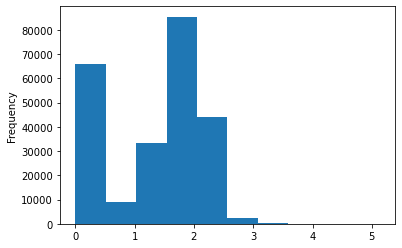

In [20]:
xnor_01['logGFP'].plot(kind='hist')

In [21]:
xnor_01.loc[:, 'log(FSC_H)'] = np.log10(np.maximum(xnor_01['FSC_H'], 1))

/work/05204/rpg/jupyter_packages/envs/dask/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/work/05204/rpg/jupyter_packages/envs/dask/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


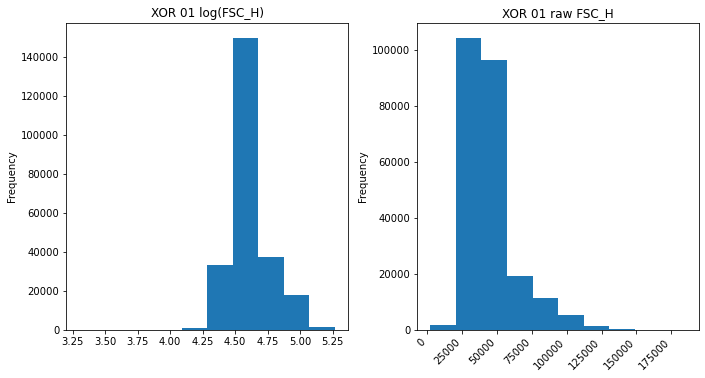

In [22]:
fig, axeses = plt.subplots(1, 2)
fig.tight_layout()
fig.set_size_inches(10, 5)
xnor_01['log(FSC_H)'].plot(kind='hist', ax=axeses[0], title='XOR 01 log(FSC_H)')
xnor_01['FSC_H'].plot(kind='hist', ax=axeses[1], title='XOR 01 raw FSC_H')
plt.setp(axeses[1].get_xticklabels(), ha="right", rotation=45);

In [23]:
xnor_01[['log(FSC_H)','FSC_H']].describe()


,log(FSC_H),FSC_H
count,240000.000000,240000.000000
mean,4.620069,44388.040017
std,0.147009,17764.942053
min,3.301681,2003.000000
25%,4.542125,34843.750000
50%,4.599293,39746.000000
75%,4.668919,46657.250000
max,5.268573,185598.000000


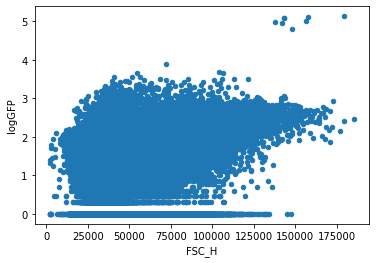

In [24]:
ax = xnor_01.plot(kind='scatter', x='FSC_H', y='logGFP')


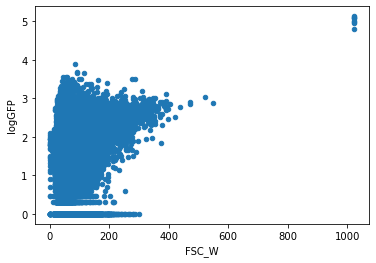

In [25]:
ax = xnor_01.plot(kind='scatter', x='FSC_W', y='logGFP')


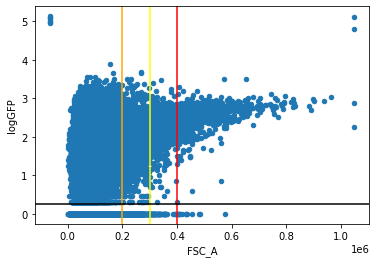

In [26]:
ax = xnor_01.plot(kind='scatter', x='FSC_A', y='logGFP')
ax.axvline(400000, color='red')
ax.axvline(200000, color='orange')
ax.axvline(300000, color='yellow');
ax.axhline(0.25, color='black');

In [27]:
xnor_01.columns

Index(['inc_temp', 'od_cutoff', 'lab_id', 'id', 'strain_name', 'gate', 'input',
       'od', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A',
       'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W',
       'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live',
       'growth_media', 'inc_time', 'well', 'logGFP', 'log(FSC_H)'],
      dtype='object')

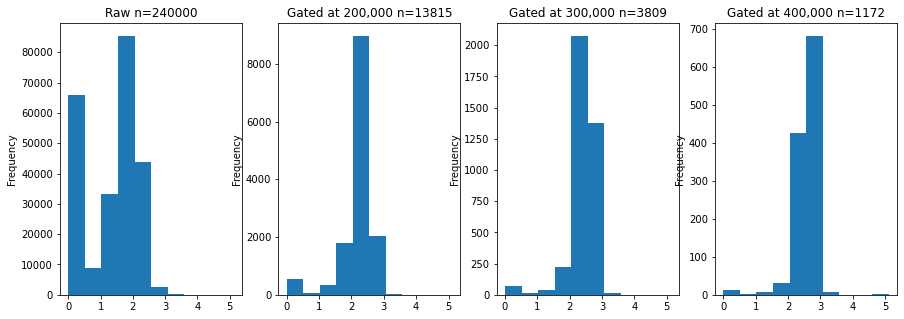

In [28]:
fig, axeses = plt.subplots(1, 4)
fig.set_size_inches(15, 5)
gated = xnor_01[xnor_01['FSC_A'] > 400000]
gated200k = xnor_01[xnor_01['FSC_A'] > 200000]
gated300k = xnor_01[xnor_01['FSC_A'] > 300000]


xnor_01['logGFP'].plot(kind='hist', ax=axeses[0], title=f'Raw n={xnor_01.shape[0]}')
gated200k['logGFP'].plot(kind='hist', ax=axeses[1], title=f'Gated at 200,000 n={gated200k.shape[0]}');
gated300k['logGFP'].plot(kind='hist', ax=axeses[2], title=f'Gated at 300,000 n={gated300k.shape[0]}');
gated['logGFP'].plot(kind='hist', ax=axeses[3], title=f'Gated at 400,000 n={gated.shape[0]}');


In [29]:
len(xnor_01['id'].unique())

8

(0.0, 100000.0)

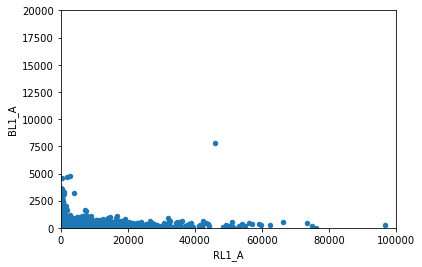

In [30]:
ax = xnor_01.plot(kind='scatter', x='RL1_A', y='BL1_A')
ax.set_ylim(0, 20000); ax.set_xlim(0, 100000)

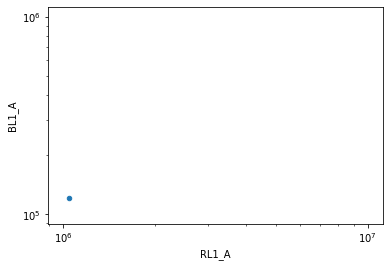

In [31]:
ax = xnor_01.plot(kind='scatter', x='RL1_A', y='BL1_A')
plt.xscale("log") ; plt.yscale("log")

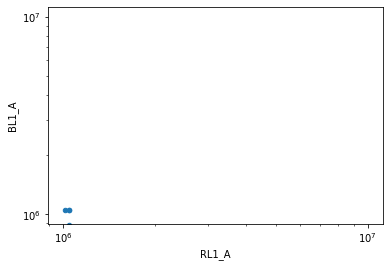

In [33]:
ax = df.plot(kind='scatter', x='RL1_A', y='BL1_A')
plt.xscale("log") ; plt.yscale("log")

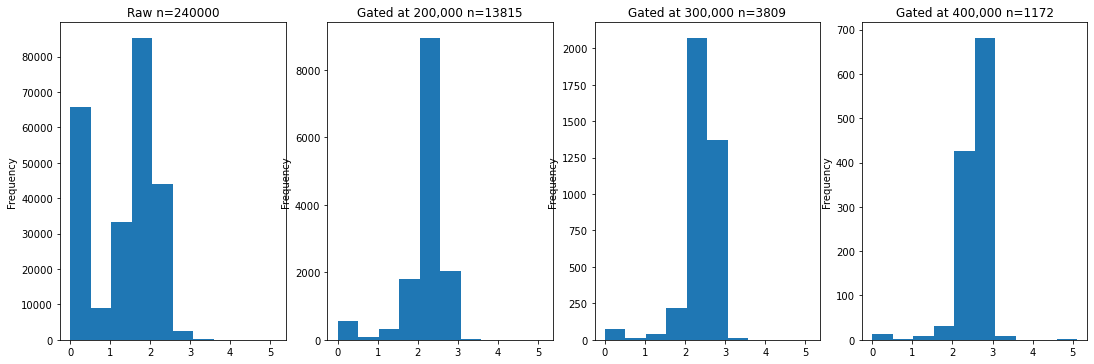

In [34]:
fig, axeses = plt.subplots(1, 4)
fig.set_size_inches(15, 5)
gated = xnor_01[xnor_01['FSC_A'] > 400000]
gated200k = xnor_01[xnor_01['FSC_A'] > 200000]
gated300k = xnor_01[xnor_01['FSC_A'] > 300000]
fig.tight_layout()

xnor_01['logGFP'].plot(kind='hist', ax=axeses[0], title=f'Raw n={xnor_01.shape[0]}')
gated200k['logGFP'].plot(kind='hist', ax=axeses[1], title=f'Gated at 200,000 n={gated200k.shape[0]}');
gated300k['logGFP'].plot(kind='hist', ax=axeses[2], title=f'Gated at 300,000 n={gated300k.shape[0]}');
gated['logGFP'].plot(kind='hist', ax=axeses[3], title=f'Gated at 400,000 n={gated.shape[0]}');


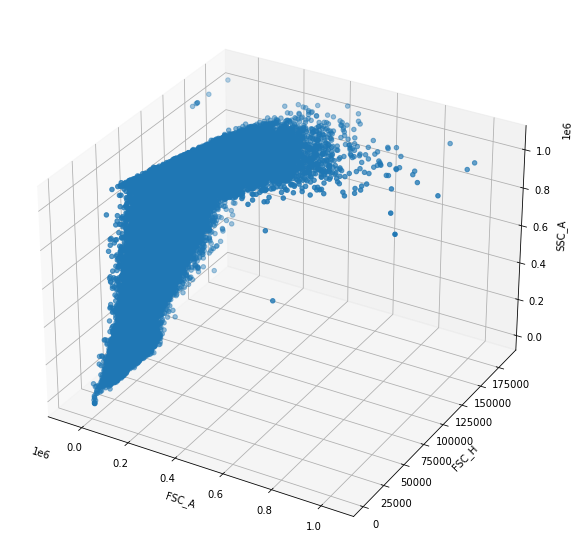

In [35]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=xnor_01['FSC_A'], ys=xnor_01['FSC_H'], zs=xnor_01['SSC_A'])
ax.set_xlabel('FSC_A')
ax.set_ylabel('FSC_H')
ax.set_zlabel('SSC_A');

# Forward scatter channels

<AxesSubplot:xlabel='FSC_W', ylabel='FSC_H'>

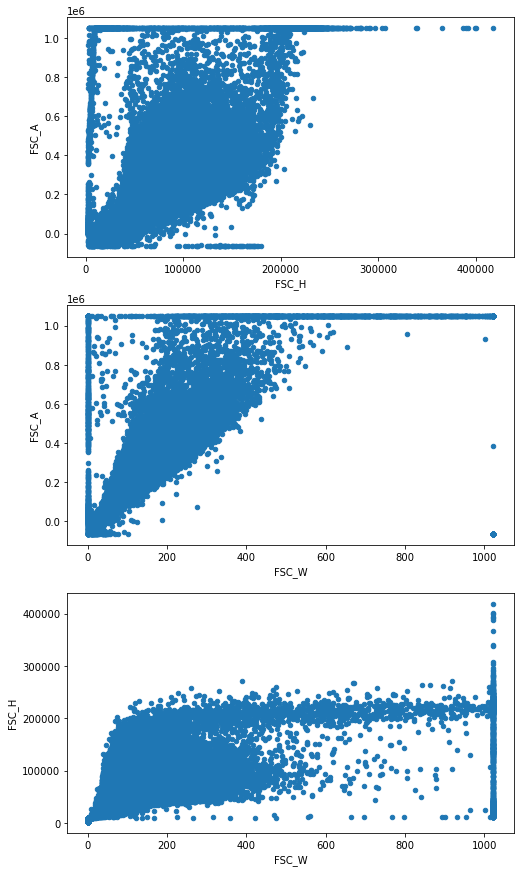

In [36]:
fig, axeses = plt.subplots(3, 1)
fig.set_size_inches(8, 15)
df.plot(kind='scatter', x= 'FSC_H', y='FSC_A', ax=axeses[0])
df.plot(kind='scatter', x= 'FSC_W', y='FSC_A', ax=axeses[1])
df.plot(kind='scatter', x= 'FSC_W', y='FSC_H', ax=axeses[2]);

<AxesSubplot:xlabel='FSC_W', ylabel='FSC_H'>

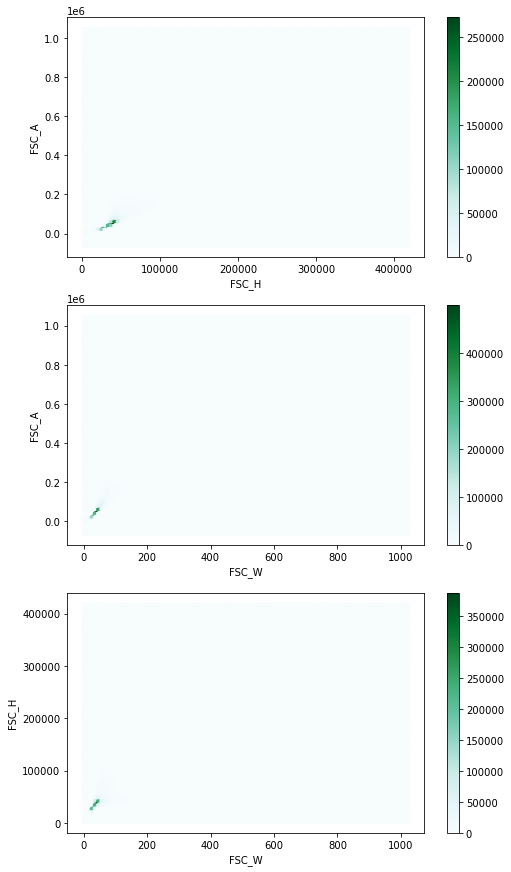

In [38]:
fig, axeses = plt.subplots(3, 1)
fig.set_size_inches(8, 15)
df.plot.hexbin(x= 'FSC_H', y='FSC_A', ax=axeses[0])
df.plot.hexbin(x= 'FSC_W', y='FSC_A', ax=axeses[1])
df.plot.hexbin(x= 'FSC_W', y='FSC_H', ax=axeses[2])

In [ ]:

model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(df['FSC_A'].to_numpy(), df['FSC_H'].to_numpy(), test_size=0.7, random_state=0)
print(X_train.shape, Y_train.shape)

In [ ]:
model.fit(X_train.reshape((-1, 1)), Y_train)

In [ ]:
model.score(X_train.reshape((-1, 1)), Y_train)

In [ ]:
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(df['FSC_A'].to_numpy(), df['FSC_W'].to_numpy(), test_size=0.7, random_state=0)
model.fit(X_train.reshape((-1, 1)), Y_train)
model.score(X_train.reshape((-1, 1)), Y_train)

# Side-scatter channels

In [ ]:
fig, axeses = plt.subplots(3, 1)
fig.set_size_inches(8, 15)
df.plot(kind='scatter', x= 'SSC_H', y='SSC_A', ax=axeses[0])
df.plot(kind='scatter', x= 'SSC_W', y='SSC_A', ax=axeses[1])
df.plot(kind='scatter', x= 'SSC_W', y='SSC_H', ax=axeses[2])

In [ ]:
fig, axeses = plt.subplots(3, 1)
fig.set_size_inches(8, 15)
df.plot(kind='hexbin', x= 'SSC_H', y='SSC_A', ax=axeses[0])
df.plot(kind='hexbin', x= 'SSC_W', y='SSC_A', ax=axeses[1])
df.plot(kind='hexbin', x= 'SSC_W', y='SSC_H', ax=axeses[2])

In [ ]:
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(df['SSC_A'].to_numpy(), df['SSC_H'].to_numpy(), test_size=0.7, random_state=0)
model.fit(X_train.reshape((-1, 1)), Y_train)
print(f"Score on training data is {model.score(X_train.reshape((-1, 1)), Y_train):.2f}")
print(f"Score on test data is {model.score(X_test.reshape((-1, 1)), Y_test):.2f}")

In [ ]:
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(df['SSC_A'].to_numpy(), df['SSC_W'].to_numpy(), test_size=0.7, random_state=0)
model.fit(X_train.reshape((-1, 1)), Y_train)
model.score(X_train.reshape((-1, 1)), Y_train)

In [ ]:
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(df['SSC_H'].to_numpy(), df['SSC_W'].to_numpy(), test_size=0.7, random_state=0)
model.fit(X_train.reshape((-1, 1)), Y_train)
model.score(X_train.reshape((-1, 1)), Y_train)

From the above, it looks like the `SSC_A` channel has the most information of the three.

# Combination of FSC and SSC

In [39]:
fig.set_size_inches(8, 8)
df.plot(kind='hexbin', x= 'FSC_A', y='SSC_A', ax=axeses[0]);

<AxesSubplot:xlabel='FSC_A', ylabel='SSC_A'>

# Will FSC_A help remove debris?

In [ ]:
df.at[:, 'no_GFP'] = df['BL1_A'] < 100

In [ ]:
df.at[:, 'GFP'] = np.logical_not(df['no_GFP'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['FSC_A'].to_numpy(), df['GFP'].to_numpy(), test_size=0.7, random_state=0)


In [ ]:
model = LogisticRegression()
model.fit(X_train.reshape((-1, 1)), Y_train)
model.score(X_train.reshape((-1, 1)), Y_train)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
xs = np.arange(0, 1000000, 10000)
#plt.model()
loss = scipy.special.expit(xs * model.coef_ + model.intercept_).ravel()
plt.plot(xs, loss, color='red', linewidth=3)
plt.xlabel('Gating Threshold')
plt.ylabel('Predicted P(GFP valid)')
plt.hlines(0.5, 0, 1000000)
plt.vlines(300000, 0.5, 1.0)
plt.hlines(0.9, 0, 1000000);

# Gating from discussions with Rob Moseley

In [ ]:
df.loc[:, 'log_GFP'] = np.log10(np.maximum(df['BL1_A'], 1))

First, remove what look like mis-calibrated fluorescence (BL1_A) readings:

In [ ]:
df_gate1 = df[df['BL1_A'] > 10]
ax = df_gate1.hist(column='log_GFP', color='gray', legend=True)
df.hist(column='log_GFP', color='lightBlue', alpha=0.5, legend=True, ax=ax);

In [ ]:
from IPython.display import Markdown as md
from IPython.display import display

proportion_retained = 100 * df_gate1.shape[0]/df.shape[0]
display(md(f"This filter retains {proportion_retained:.0f}% of the events."))


After this gating, what is the residual effect of gating by forward scatter area (FSC_A)?

In [ ]:
def local_scope(df):
    unfiltered_count = df.shape[0]
    X_train, X_test, Y_train, Y_test = train_test_split(df['FSC_A'].to_numpy(), df['GFP'].to_numpy(), test_size=0.7, random_state=0)
    model = LogisticRegression()
    model.fit(X_train.reshape((-1, 1)), Y_train)
    xs = np.arange(0, 1000000, 10000)
    loss = scipy.special.expit(xs * model.coef_ + model.intercept_).ravel()
    plt.plot(xs, loss, color='red', linewidth=3)
    plt.hlines(0.5, 0, 1000000)
    plt.vlines(300000, 0.5, 1.0)
    plt.hlines(0.9, 0, 1000000)
    ax = plt.gca()
    ax.set_xlabel('FSC_A')
    ax.set_ylabel('p(Has GFP)')
    def remainder(threshold):
        return (df['FSC_A'] > threshold).value_counts()[True] / unfiltered_count
    ax = ax.twinx()
    ax.plot(xs, np.vectorize(remainder)(xs))
    ax.set_ylabel('Remaining samples/total')
    print(f"Score on training data is {model.score(X_train.reshape((-1, 1)), Y_train):.2f}")
    print(f"Score on test data is {model.score(X_test.reshape((-1, 1)), Y_test):.2f}")
    
local_scope(df_gate1)


In [ ]:
def local_scope(df, channel: str, max=1000000):
    unfiltered_count = df.shape[0]
    X_train, X_test, Y_train, Y_test = train_test_split(df[channel].to_numpy(), df['GFP'].to_numpy(), test_size=0.7, random_state=0)
    model = LogisticRegression()
    model.fit(X_train.reshape((-1, 1)), Y_train)
    xs = np.arange(0, max, 10000)
    loss = scipy.special.expit(xs * model.coef_ + model.intercept_).ravel()
    plt.plot(xs, loss, color='red', linewidth=3)
    #plt.hlines(0.5, 0, max)
    #plt.vlines(300000, 0.5, 1.0)
    #plt.hlines(0.9, 0, 1000000)
    ax = plt.gca()
    ax.set_xlabel(channel)
    ax.set_ylabel('p(Has GFP)')
    def remainder(threshold):
        try:
            return (df[channel] > threshold).value_counts()[True] / unfiltered_count
        except KeyError:
            return 0
    ax = ax.twinx()
    ax.plot(xs, np.vectorize(remainder)(xs))
    ax.set_ylabel('Remaining samples/total')
    print(f"Score on training data is {model.score(X_train.reshape((-1, 1)), Y_train):.2f}")
    print(f"Score on test data is {model.score(X_test.reshape((-1, 1)), Y_test):.2f}")
    
local_scope(df_gate1, 'FSC_H', max=400000)


In [ ]:
def local_scope(df, channel: str, max=1000000, step=10000):
    unfiltered_count = df.shape[0]
    X_train, X_test, Y_train, Y_test = train_test_split(df[channel].to_numpy(), df['GFP'].to_numpy(), test_size=0.7, random_state=0)
    model = LogisticRegression()
    model.fit(X_train.reshape((-1, 1)), Y_train)
    xs = np.arange(0, max, step)
    loss = scipy.special.expit(xs * model.coef_ + model.intercept_).ravel()
    plt.plot(xs, loss, color='red', linewidth=3)
    #plt.hlines(0.5, 0, max)
    #plt.vlines(300000, 0.5, 1.0)
    #plt.hlines(0.9, 0, 1000000)
    ax = plt.gca()
    ax.set_xlabel(channel)
    ax.set_ylabel('p(Has GFP)')
    def remainder(threshold):
        try:
            return (df[channel] > threshold).value_counts()[True] / unfiltered_count
        except KeyError:
            return 0
    ax = ax.twinx()
    ax.plot(xs, np.vectorize(remainder)(xs))
    ax.set_ylabel('Remaining samples/total')
    print(f"Score on training data is {model.score(X_train.reshape((-1, 1)), Y_train):.2f}")
    print(f"Score on test data is {model.score(X_test.reshape((-1, 1)), Y_test):.2f}")
    
local_scope(df_gate1, 'FSC_W', max=1000, step=100)

None of the above graphs suggests that it will be possible to gate by forward scatter without losing an unacceptable amount of data.